### A. Readme First
- Apabila kalian pengguna Ubuntu dari versi 14.04 hingga latest version, kalian bisa langsung menjalankan `Cell` &#8594; `Run All`.
- Apabila kalian bukan salah satu pengguna Ubuntu versi 14.04 hingga latest version, diharapkan untuk mengunduh dan mengekstrasi `Tugas Lab 4 - Images` dan melakukan ekstrasi hasilnya tepat di sebelah `MRS-Lab 4-A-2006609645-A-2006560876.ipynb` lalu menjalankan `Cell` &#8594; `Run All`.

### B. Persiapan Lingkungan Laboratorium
- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 4` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 4` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

#### 1. Instalasi _Package_/_Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [1]:
pip install numpy scikit-image matplotlib gdown scipy

  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0e/ba/53e1bfbdfd0f94514d71502e3acea494a8b4b57c457adbc333ef386485da/scikit_image-0.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cd/d6/8c4dfb23151d5a494c66ebbfdb5c8c433b44ec07fae52da5939fcda0943f/matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/14/d0475ceeaa047f3eae2dc7597c3d40228e1d5beee42c1730f3c96ffb5526/scipy-1.5.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/59/bb/d2b85265ec9fa3c1922210c9393d4cdf7075cc87cce6fe671d7455f80fbc/PyWavelets-1.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6e/57/5d899fae74c1752f52869b613a8210a2480e1a69688e65df6cb26117d45d/imageio-2.9.0-py3-none-a

#### 2. Melakukan _Import Library_ 

In [2]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening
from skimage.morphology import black_tophat, white_tophat
from helper import *
from scipy import fftpack as fp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#### 3. Unduh dan Ekstrasi Dokumen Pendukung

In [3]:
os.system('gdown https://drive.google.com/uc?id=1AQQe4EzwCaFwVXAuhHYXnJ_PjV8Oq3cl')
os.system('unzip Tugas\ Lab\ 4\ -\ Images.zip')

256

### C. Soal 

1. **[50] Noise Removal** \
(Ilustrasi) Berikut adalah sebuah citra peta yang telah diretas oleh alien sehingga mengandung noise yang teratur. Kita bisa menghilangkan noise tersebut dengan _filtering_ pada citra di domain frekuensi. Berikut adalah tahapan-tahapan yang harus dilakukan:
![noisy_map.png](Tugas%20Lab%204%20-%20Images/noisy_map.png)
    - [15] Tampilkan citra tersebut pada domain frekuensi!
    - [20] Lakukan _notch filtering_ untuk menghilangkan/melemahkan titik pada frekuensi dengan intensitas yang tinggi!
    - [15] Tampilkan perbandingan citra sebelum dan sesudah _filtering_ pada domain spasial dan frekuensi!

##### a. Menampilkan citra pada domain frekuensi 

In [4]:
basePath = 'Tugas Lab 4 - Images/'
def getPath(fileName):
    return basePath + fileName

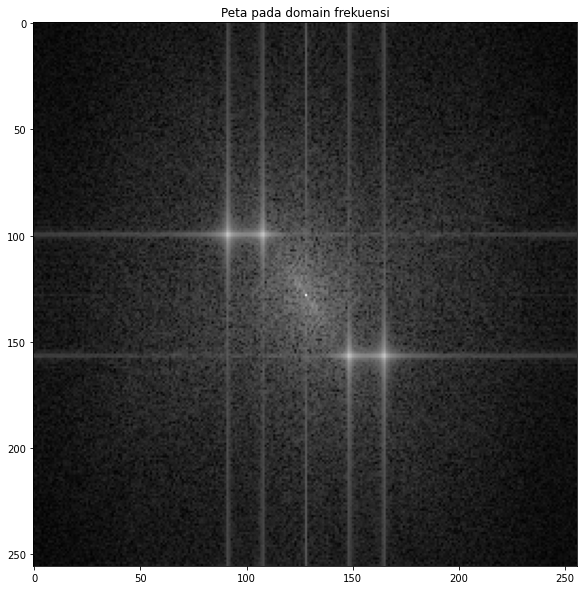

In [98]:
# Load noisy map
noisy_map = util.img_as_float(io.imread(getPath('noisy_map.png')))

# Menghitung Discrete Fourier Transform
noisy_map_dft = fp.fft2(noisy_map)

# Scaling & Shifting for fourier spectrum display
noisy_map_dft_shift = fp.fftshift(noisy_map_dft)
noisy_map_dft_shift = np.log(1+abs(noisy_map_dft_shift))

# Menampilkan citra pada domain frekuensi
plt.show()
plt.figure(figsize=(20,10))
plt.rc('font', size=10)
plt.title('Peta pada domain frekuensi')
plt.imshow(noisy_map_dft_shift, cmap='gray')
plt.show()

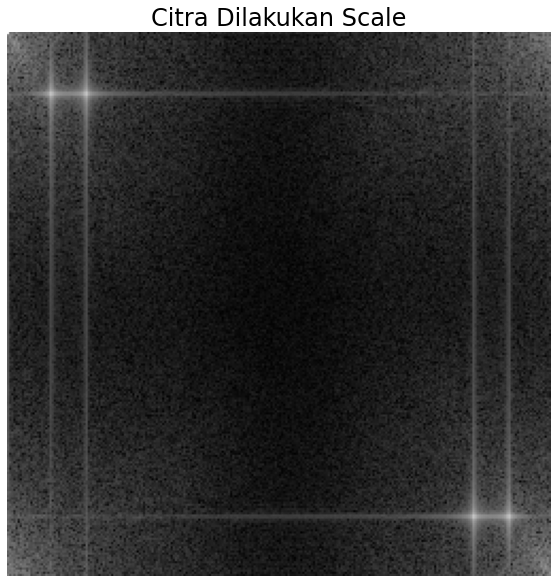

In [91]:
## Menampilkan Citra Setelah Dilakukan Scale untuk Mendapatkan Insight

plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Citra Dilakukan Scale')
plt.imshow(noisy_map_dft_scale, cmap='gray')
plt.axis('off')

plt.show()

##### b. Melakukan notch filtering

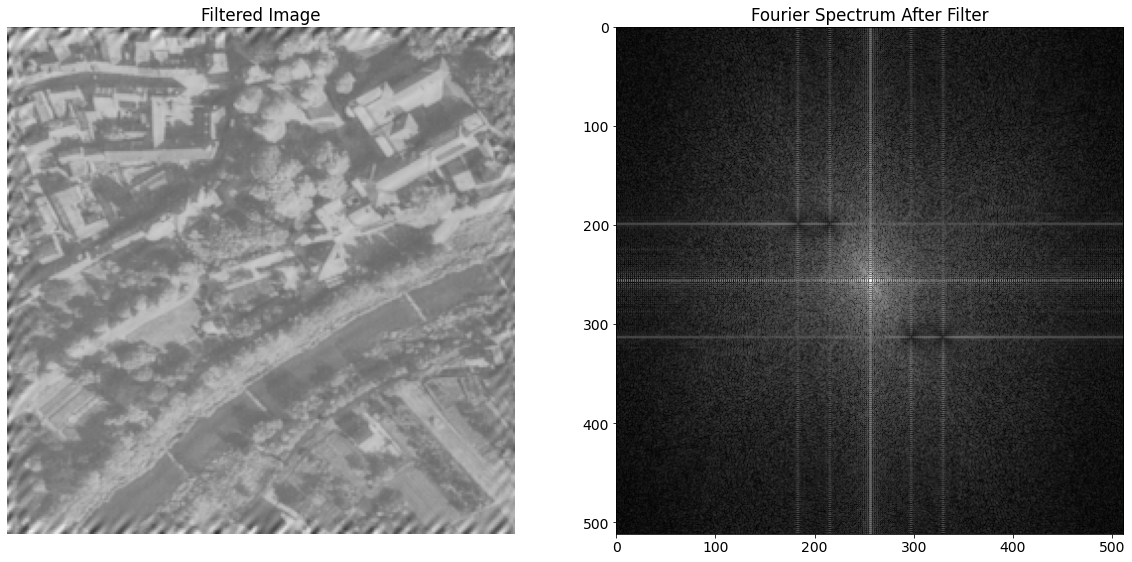

In [117]:
w_noisy_map, l_noisy_map = paddedsize(noisy_map.shape[0],noisy_map.shape[1])

# Calculate DFT
noisy_map_dft = fp.fft2(util.img_as_float(noisy_map),(w_noisy_map, l_noisy_map))
noisy_map_scale = np.log(1 + abs(noisy_map_dft))

# Apply notch filter
H1 = notch('gaussian', w_noisy_map, l_noisy_map, 12, -72, -56)
H2 = notch('gaussian', w_noisy_map, l_noisy_map, 12, -40, -56)
H3 = notch('gaussian', w_noisy_map, l_noisy_map, 12, 42, 58)
H4 = notch('gaussian', w_noisy_map, l_noisy_map, 12, 74, 58)

# Apply notch filter
noisy_map_notch = noisy_map_dft * H1 * H2 * H3 * H4

# Calculate IDFT for spatial domain transformation
noisy_map_idft_notch = fp.ifft2(noisy_map_notch).real
noisy_map_idft_notch = noisy_map_idft_notch[:noisy_map.shape[0],:noisy_map.shape[1]]

# Scaling & Shifting for fourier spectrum display
noisy_map_notch_shift = fp.fftshift(noisy_map_notch)
res_noisy_map_notch_shift = np.log(1+abs(noisy_map_notch_shift))

# Show image
plt.figure(figsize=(20,20))
plt.rc('font', size=14)
plt.subplot(1,2,1); plt.imshow(noisy_map_idft_notch, cmap='gray')
plt.title('Filtered Image')
plt.axis("off")

plt.subplot(1,2,2);
plt.imshow(res_noisy_map_notch_shift, cmap='gray')
plt.title('Fourier Spectrum After Filter')

plt.show()

##### c. Menampilkan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi

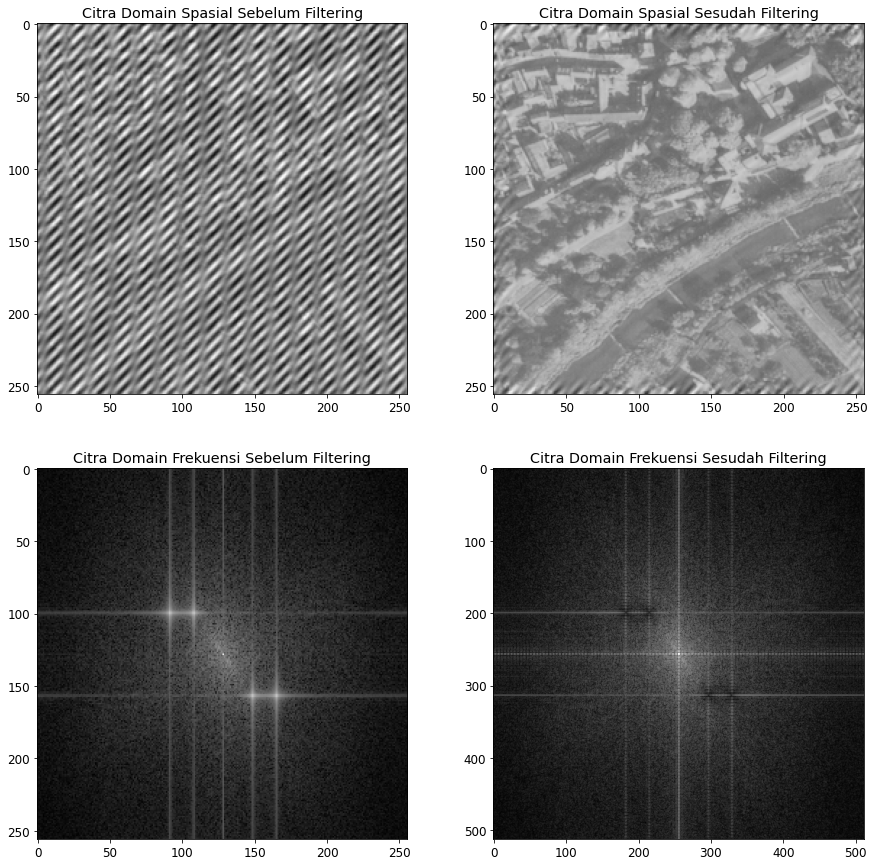

In [118]:
citra_domain_spasial = [noisy_map, noisy_map_idft_notch]
citra_domain_frekuensi = [noisy_map_dft_shift, res_noisy_map_notch_shift]
label = ['Sebelum', 'Sesudah']

plt.figure(figsize=(15,15))
plt.rc('font', size=12)

for i in range(2):
    plt.subplot(2,2,i+1);
    plt.imshow(citra_domain_spasial[i], cmap='gray')
    plt.title('Citra Domain Spasial %s Filtering' % label[i])

    plt.subplot(2,2,i+3);
    plt.imshow(citra_domain_frekuensi[i], cmap='gray')
    plt.title('Citra Domain Frekuensi %s Filtering' % label[i])

plt.show()

2. **[50] Lowpass / Highpass Filtering** \
Diberikan citra `purple.png` dengan ukuran $450 \times 300$ berikut ini
![purple.png](Tugas%20Lab%204%20-%20Images/purple.png)
    - [25] Lowpass Filter
        - [4] Terapkan Gaussian Lowpass Filter terhadap citra dan tampilkan hasilnya!
        - [4] Terapkan Ideal Lowpass Filter terhadap citra dan tampilkan hasilnya!
        - [4] Terapkan Butterworth Lowpass Filter terhadap citra dan tampilkan hasilnya!
        - [13] Tampilkan empat citra pada domain spasial dan frekuensi: $\text{Citra Asli}$, $\text{Gaussian Lowpass Filter}$, $\text{Ideal Lowpass Filter}$, $\text{Butterworth Lowpass}$ filter! Jelaskan perbedaan dari masing-masing citra tersebut!
    - [25] Highpass Filter
        - [4] Terapkan Gaussian Highpass Filter terhadap citra dan tampilkan hasilnya!
        - [4] Terapkan Ideal Highpass Filter terhadap citra dan tampilkan hasilnya!
        - [4] Terapkan Butterworth Highpass Filter terhadap citra dan tampilkan hasilnya!
        - [13] Tampilkan empat citra pada domain spasial dan frekuensi: $\text{Citra Asli}$, $\text{Gaussian Lowpass Filter}$, $\text{Ideal Lowpass Filter}$, $\text{Butterworth Lowpass}$ filter! Jelaskan perbedaan dari masing-masing citra tersebut!

##### a. Lowpass Filter 

###### a.1. Gaussian Lowpass Filter 

In [105]:
# Load image
purple = color.rgb2gray(io.imread(getPath('purple.png')))
w, l = paddedsize(purple.shape[0], purple.shape[1])

In [109]:
# Calculate DFT
purple_dft = fp.fft2(purple, (w,l))

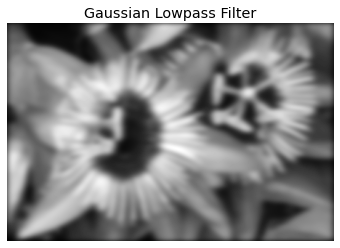

In [110]:
# Create gaussian lowpass filter
h_gaussian = lpfilter('gaussian', w, l, 0.05 * w)

# Apply lowpass filter
LPFS_purple_gaussian = h_gaussian * purple_dft

# Calculate IDFT for spatial domain transformation
LPF_purple_gaussian = fp.ifft2(LPFS_purple_gaussian).real
LPF_purple_gaussian = LPF_purple_gaussian[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_gaussian = fp.fftshift(purple_dft)
LPFS_purple_shift_gaussian = fp.fftshift(LPFS_purple_gaussian)

# Scaling for fourier spectrum display
S1_gaussian = np.log(1+abs(purple_shift_gaussian))
S2_gaussian = np.log(1+abs(LPFS_purple_shift_gaussian))

# Show image
plt.imshow(LPF_purple_gaussian, cmap='gray')
plt.title("Gaussian Lowpass Filter")
plt.axis("off")

plt.show()

###### a.2. Ideal Lowpass Filter

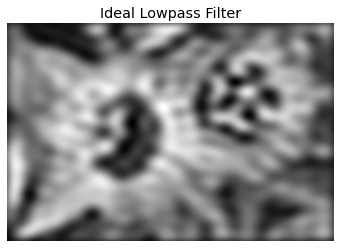

In [111]:
# Create ideal lowpass filter
h_ideal = lpfilter('ideal', w, l, 0.05 * w)

# Apply lowpass filter
LPFS_purple_ideal = h_ideal * purple_dft

# Calculate IDFT for spatial domain transformation
LPF_purple_ideal = fp.ifft2(LPFS_purple_ideal).real
LPF_purple_ideal = LPF_purple_ideal[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_ideal = fp.fftshift(purple_dft)
LPFS_purple_shift_ideal = fp.fftshift(LPFS_purple_ideal)

# Scaling for fourier spectrum display
S1_ideal = np.log(1+abs(purple_shift_ideal))
S2_ideal = np.log(1+abs(LPFS_purple_shift_ideal))

# Show image
plt.imshow(LPF_purple_ideal, cmap='gray')
plt.title("Ideal Lowpass Filter")
plt.axis("off")

plt.show()

###### a.3. Butterworth Lowpass Filter 

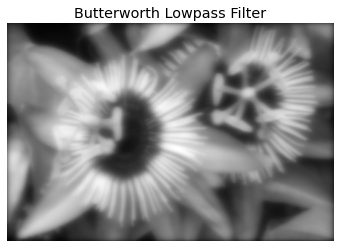

In [113]:
# Create btw lowpass filter
h_btw = lpfilter('btw', w, l, 0.05 * w)

# Apply lowpass filter
LPFS_purple_btw = h_btw * purple_dft

# Calculate IDFT for spatial domain transformation
LPF_purple_btw = fp.ifft2(LPFS_purple_btw).real
LPF_purple_btw = LPF_purple_btw[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_btw = fp.fftshift(purple_dft)
LPFS_purple_shift_btw = fp.fftshift(LPFS_purple_btw)

# Scaling for fourier spectrum display
S1_btw = np.log(1+abs(purple_shift_btw))
S2_btw = np.log(1+abs(LPFS_purple_shift_btw))

# Show image
plt.imshow(LPF_purple_btw, cmap='gray')
plt.title("Butterworth Lowpass Filter")
plt.axis("off")

plt.show()

###### a.4. Semua citra sebelum dan sesudah filter (spasial dan frekuensi)

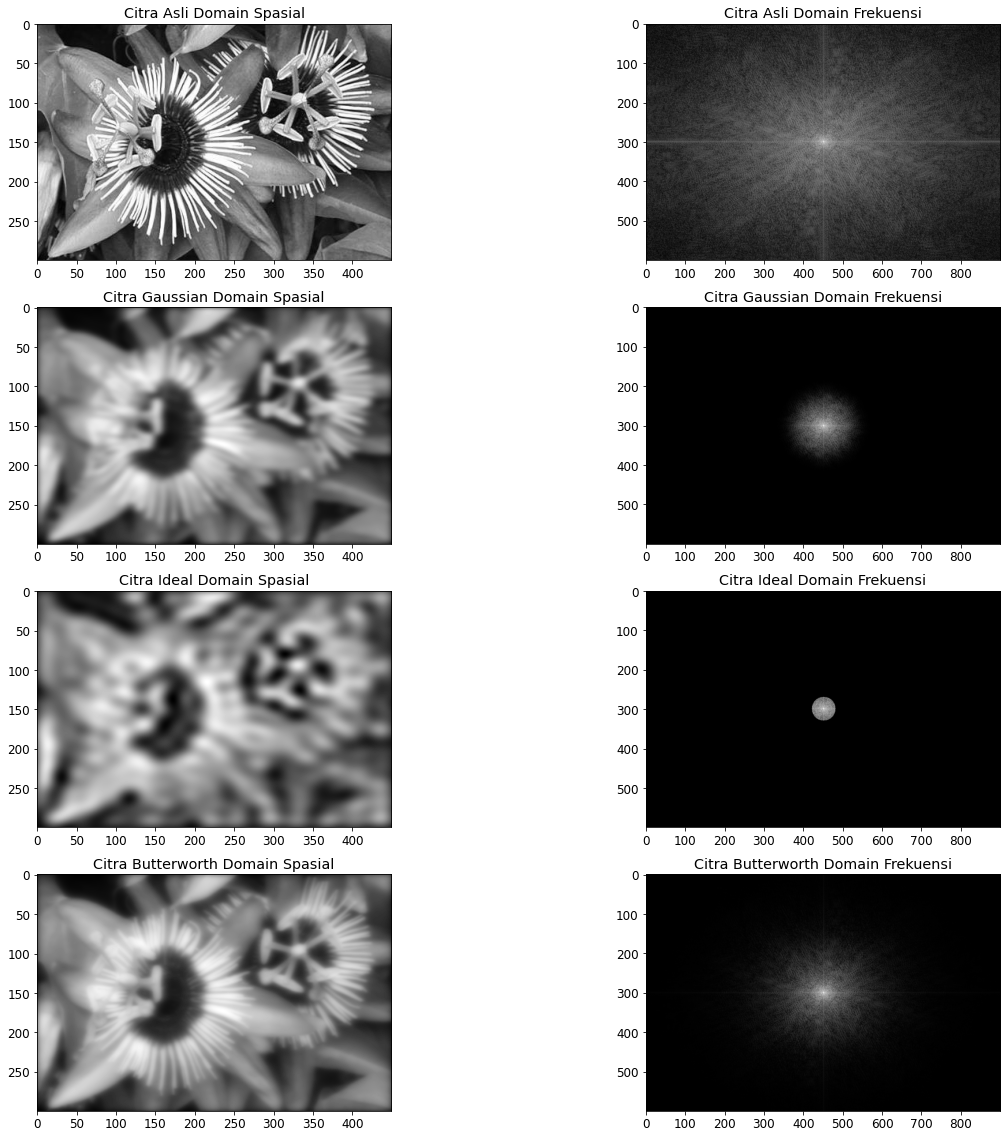

In [116]:
spasial_citra = [purple, LPF_purple_gaussian, LPF_purple_ideal, LPF_purple_btw]
frekuensi_citra = [S1_gaussian, S2_gaussian, S2_ideal, S2_btw]
labels = ['Asli', 'Gaussian', 'Ideal', 'Butterworth']

plt.figure(figsize=(20,20))
plt.rc('font', size=12)
for i in range(4):
    plt.subplot(len(spasial_citra), 2, 2*i + 1)
    plt.imshow(spasial_citra[i], cmap='gray')
    plt.title("Citra %s Domain Spasial" % labels[i])

    plt.subplot(len(spasial_citra), 2, 2*i + 2)
    plt.imshow(frekuensi_citra[i], cmap='gray')
    plt.title("Citra %s Domain Frekuensi" % labels[i])

plt.show()

Perbedaan: TBD

###### b.1. Gaussian Highpass Filter 

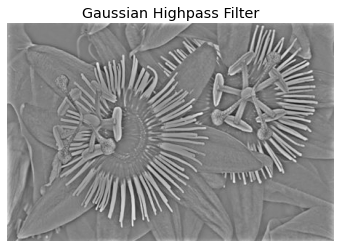

In [124]:
# Create gaussian lowpass filter
h_gaussian = hpfilter('gaussian', w, l, 0.05 * w)

# Apply lowpass filter
HPFS_purple_gaussian = h_gaussian * purple_dft

# Calculate IDFT for spatial domain transformation
HPF_purple_gaussian = fp.ifft2(HPFS_purple_gaussian).real
HPF_purple_gaussian = HPF_purple_gaussian[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_gaussian = fp.fftshift(purple_dft)
HPFS_purple_shift_gaussian = fp.fftshift(HPFS_purple_gaussian)

# Scaling for fourier spectrum display
S1_gaussian = np.log(1+abs(purple_shift_gaussian))
S2_gaussian = np.log(1+abs(HPFS_purple_shift_gaussian))

# Show image
plt.imshow(HPF_purple_gaussian, cmap='gray')
plt.title("Gaussian Highpass Filter")
plt.axis("off")

plt.show()

###### b.2. Ideal Highpass Filter

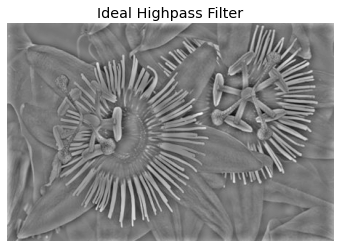

In [123]:
# Create ideal lowpass filter
h_ideal = hpfilter('ideal', w, l, 0.05 * w)

# Apply lowpass filter
HPFS_purple_ideal = h_ideal * purple_dft

# Calculate IDFT for spatial domain transformation
HPF_purple_ideal = fp.ifft2(HPFS_purple_ideal).real
HPF_purple_ideal = HPF_purple_ideal[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_ideal = fp.fftshift(purple_dft)
HPFS_purple_shift_ideal = fp.fftshift(HPFS_purple_ideal)

# Scaling for fourier spectrum display
S1_ideal = np.log(1+abs(purple_shift_ideal))
S2_ideal = np.log(1+abs(HPFS_purple_shift_ideal))

# Show image
plt.imshow(HPF_purple_ideal, cmap='gray')
plt.title("Ideal Highpass Filter")
plt.axis("off")

plt.show()

###### b.3. Butterworth Highpass Filter 

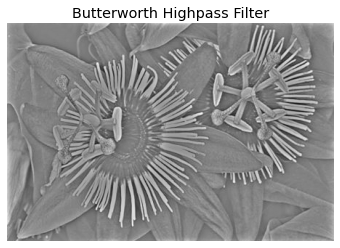

In [122]:
# Create btw lowpass filter
h_btw = hpfilter('btw', w, l, 0.05 * w)

# Apply lowpass filter
HPFS_purple_btw = h_btw * purple_dft

# Calculate IDFT for spatial domain transformation
HPF_purple_btw = fp.ifft2(HPFS_purple_btw).real
HPF_purple_btw = HPF_purple_btw[:purple.shape[0],:purple.shape[1]]

# Shifting for fourier spectrum display
purple_shift_btw = fp.fftshift(purple_dft)
HPFS_purple_shift_btw = fp.fftshift(HPFS_purple_btw)

# Scaling for fourier spectrum display
S1_btw = np.log(1+abs(purple_shift_btw))
S2_btw = np.log(1+abs(HPFS_purple_shift_btw))

# Show image
plt.imshow(HPF_purple_btw, cmap='gray')
plt.title("Butterworth Highpass Filter")
plt.axis("off")

plt.show()

###### b.4. Semua citra sebelum dan sesudah filter (spasial dan frekuensi)

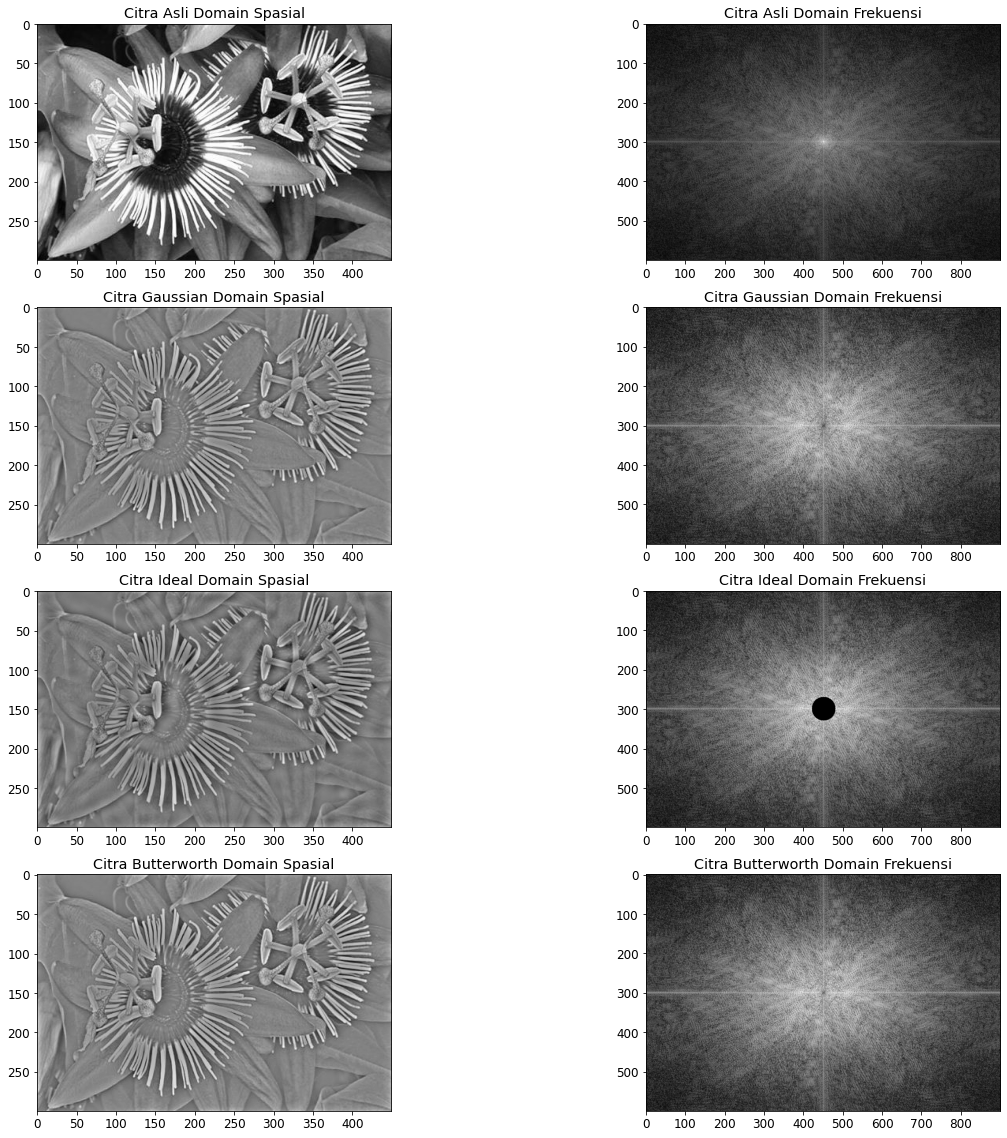

In [127]:
spasial_citra = [purple, HPF_purple_gaussian, HPF_purple_ideal, HPF_purple_btw]
frekuensi_citra = [S1_gaussian, S2_gaussian, S2_ideal, S2_btw]
labels = ['Asli', 'Gaussian', 'Ideal', 'Butterworth']

plt.figure(figsize=(20,20))
plt.rc('font', size=12)
for i in range(4):
    plt.subplot(len(spasial_citra), 2, 2*i + 1)
    plt.imshow(spasial_citra[i], cmap='gray')
    plt.title("Citra %s Domain Spasial" % labels[i])

    plt.subplot(len(spasial_citra), 2, 2*i + 2)
    plt.imshow(frekuensi_citra[i], cmap='gray')
    plt.title("Citra %s Domain Frekuensi" % labels[i])

plt.show()